In [29]:
import  pandas  as  pd
import  numpy as  np                   
import seaborn as sns                  
import matplotlib.pyplot as plt
import os
from sklearn import preprocessing
import csv
from sklearn.model_selection import train_test_split

In [54]:
base="C:\Users\SHUBHAM\Desktop\sank-additional"
fil="bank-additional-full.csv"
f=os.path.join(base,fil)
#print f
data = pd.read_csv(f,sep=";")
#print data



#The following function is used to preprocess pandas dataframe,so that we can apply ML model on the data.
def preprocess(df_train):
    features = ['job','marital','default','education','housing','loan','contact','month','poutcome']
    for feature in features:
        pre = preprocessing.LabelEncoder()
        pre = pre.fit(df_train[feature])
        df_train[feature] = pre.transform(df_train[feature])
    return df_train
data['y']=data['y'].replace(['yes', 'no'],(1,0))
data = preprocess(data)
p=data
label=data['y']
data = data.drop(['y'], axis = 1)
data=data.drop(['day_of_week'], axis=1)
#print data.head()

## Data visualization

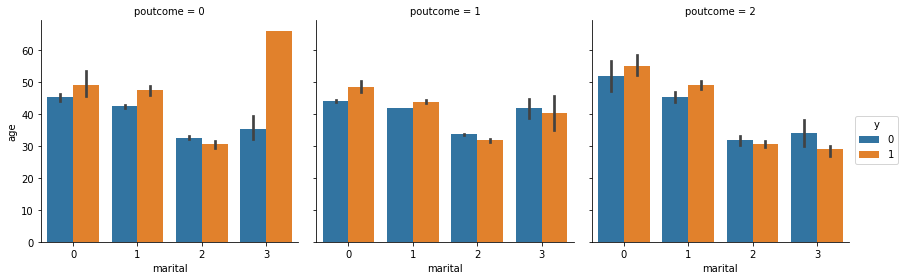

In [57]:
plot=sns.factorplot(x='marital', y='age', data=p, hue='y',col='poutcome',kind = 'bar')              

## Training data with supervised learning models

In [44]:
X_train, X_test, y_train, y_test = train_test_split(data,label, test_size=0.3, random_state=40)

### Logistic Regression

In [47]:
from sklearn import linear_model 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import accuracy_score
logistic= linear_model.LogisticRegression(penalty = 'l1',C=0.5)
#print X_train

logistic.fit(X_train,y_train)
y_pred = logistic.predict(X_test)
cnf = confusion_matrix(y_pred,y_test)
accuracy_score(y_pred,y_test)

0.9063688597556041

### Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators = 100, max_depth=10, random_state=13,criterion='gini')
random.fit(X_train,y_train)
y_pred = random.predict(X_test)
# We can get accuracy without confusion matrix
accuracy_score(y_pred,y_test)

0.909686817188638

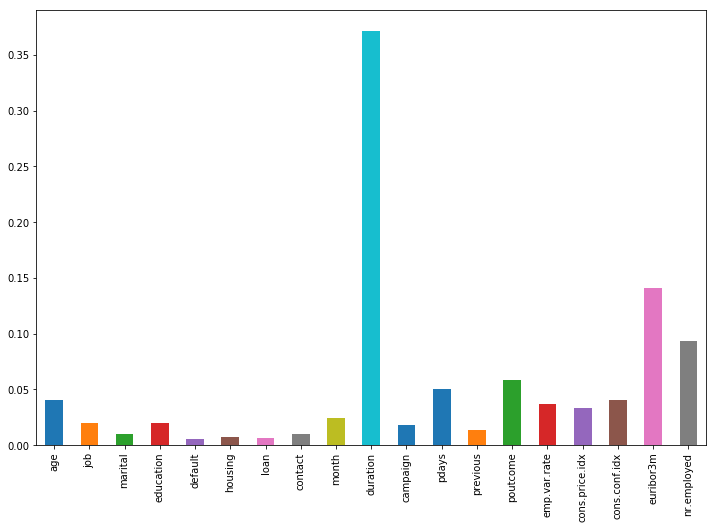

In [52]:
# Random forest has the ability to check which feature contribute more in ML model accuracy using informaton gain.

importances=pd.Series(random.feature_importances_, index=data.columns)
importances.plot(kind='bar', figsize=(12,8))
